## DATA 620 Assignment Week 2, Part 1  

<b>Stephen Jones</b>  
<b>Group 6: Alice Friedman, Stephen Jones, Jeffrey Littlejohn, Jun Pan</b>  
<b>June 9, 2019</b>  
### Import relevant packages

`matplotlib`, `numpy`, `neo4j`, `networkx`, `pandas` are loaded to the workspace. 

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import neo4j as neo
import networkx as nx
import pandas as pd

### Data import

Read the edgelist as object "g". We used the `sx-mathoverflow` data from https://snap.stanford.edu/data/#socnets, which consists of "Comments, questions, and answers on Math Overflow".

From the data description:

<i>"This is a temporal network of interactions on the stack exchange web site Math Overflow. There are three different types of interactions represented by a directed edge (u, v, t):  
    
   - user u answered user v's question at time t (in the graph sx-mathoverflow-a2q)  
   - user u commented on user v's question at time t (in the graph sx-mathoverflow-c2q)  
   - user u commented on user v's answer at time t (in the graph sx-mathoverflow-c2a)  
   
The graph sx-mathoverflow contains the union of these graphs. These graphs were constructed from the Stack Exchange Data Dump. Node ID numbers correspond to the 'OwnerUserId' tag in that data dump."</i>

We first chose to examine the data of answered questions; each node represents a user (labeled with a user id), while each edge represents an answered question between two users.

Thereafter we will examine the union of the three edgelists, `sx-mathoverflow`, which illustrates all interactions.

Citation:  

- Ashwin Paranjape, Austin R. Benson, and Jure Leskovec. "Motifs in Temporal Networks." In Proceedings of the Tenth ACM International Conference on Web Search and Data Mining, 2017.

# MathOverflow: Questions Answered

In [44]:
g=nx.read_edgelist('C:\MSDS\Python\MathOverflow\sx-mathoverflow.txt\sx-mathoverflow-a2q.txt', create_using=nx.DiGraph(), nodetype=int, data=(('weight',float),))

To preserve the edgelist with no alterations, we rename to G; next we obtain the number of nodes to limit the scope of our plot.

In [45]:
G=g

nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 21688\nNumber of edges: 90489\nAverage in degree:   4.1723\nAverage out degree:   4.1723'

#### Subsetting the data  

There are more than 24K nodes; let's keep only nodes with 500 or more outgoing edges. We've preserved the original edgelist as G.

Reference: https://stackoverflow.com/questions/8576737/how-to-only-keep-nodes-in-networkx-graph-with-2-outgoing-edges-or-0-outgoing-ed

In [46]:
outdeg = G.out_degree()
to_remove = [n for (n,deg) in outdeg if outdeg[n] <= 100 ]

G.remove_nodes_from(to_remove)

View the resulting data.

In [47]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 183\nNumber of edges: 4122\nAverage in degree:  22.5246\nAverage out degree:  22.5246'

#### Set node colors and size

Obtain size of node from degree, set color from degree https://stackoverflow.com/questions/35782251/python-how-to-color-the-nodes-of-a-network-according-to-their-degree

In [48]:
degrees=G.degree()
nodes=G.nodes()

n_color=np.asarray([degrees[n] for n in nodes])

### Plot

Plot the network.

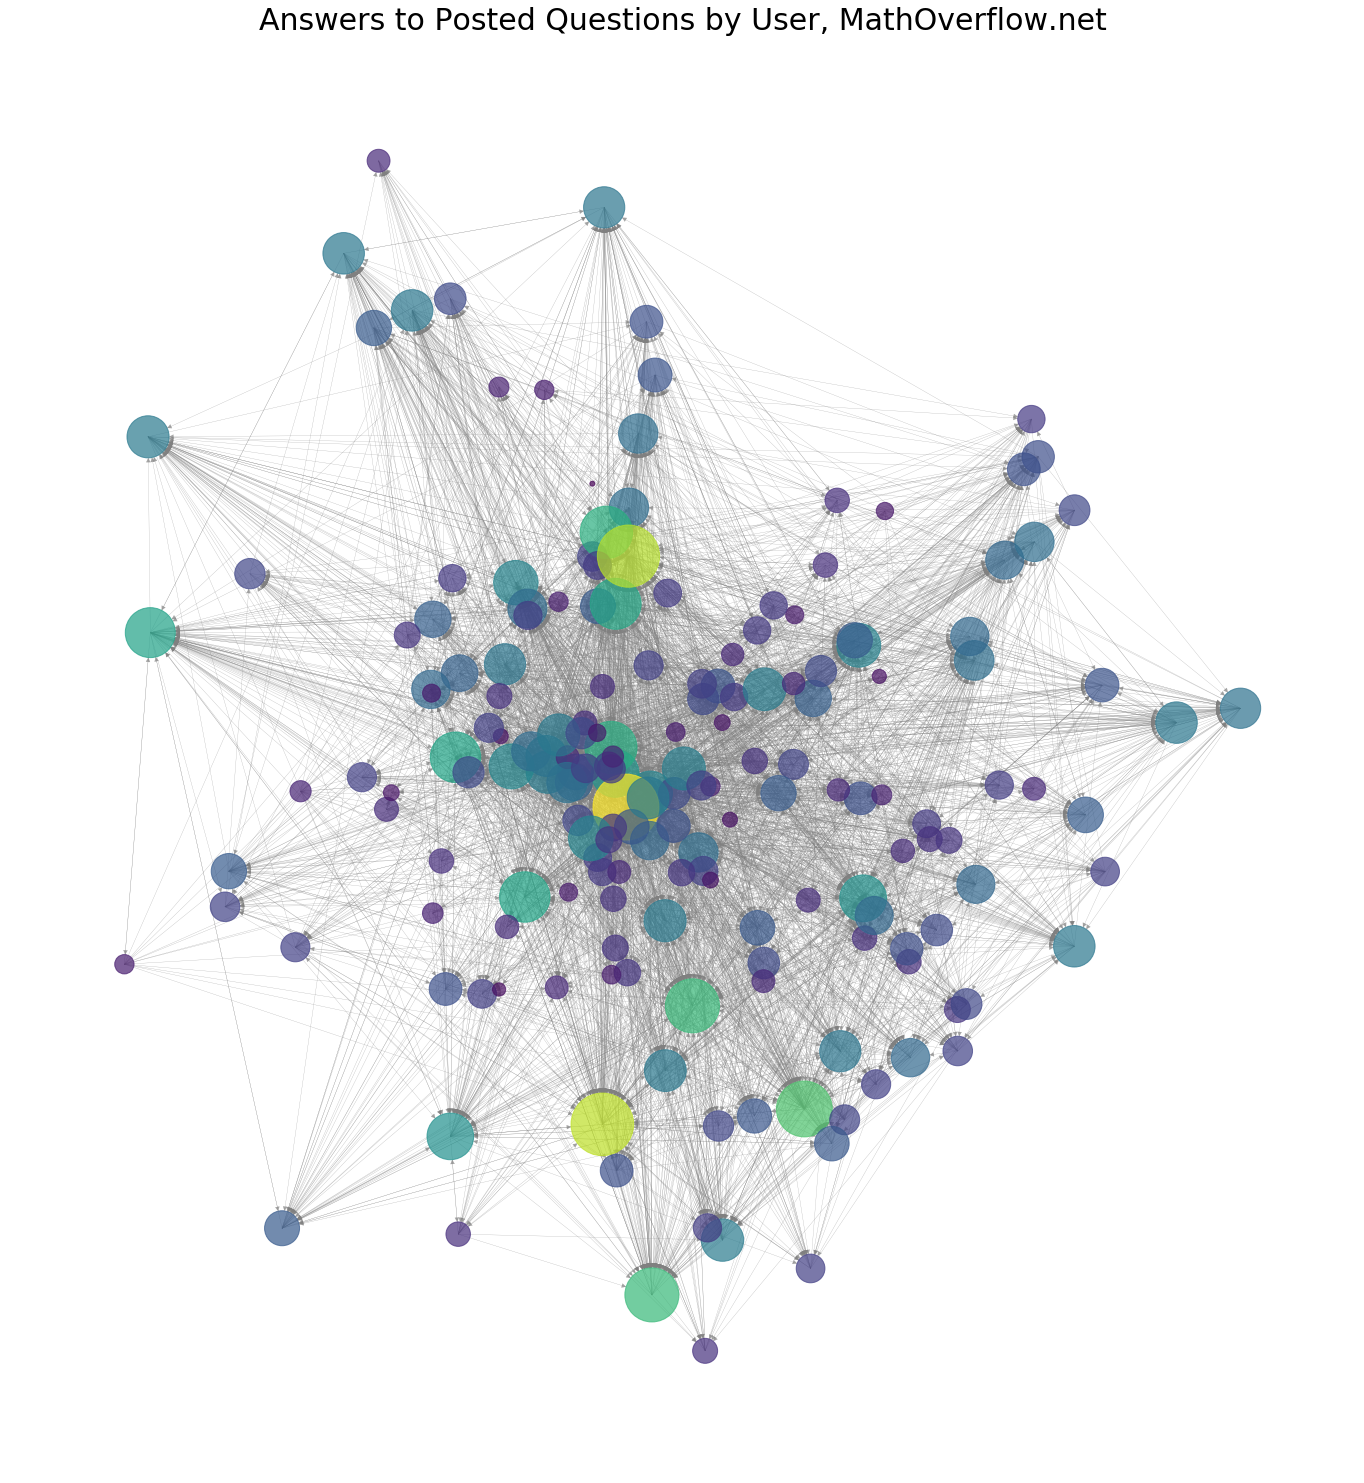

In [49]:
import warnings
from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111,aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

nx.draw(G,
        node_color=n_color,
        with_labels = False, 
        node_size=n_color*25,
        edge_color='gray', 
        font_size=10,
        font_color='black',
        cmap='viridis',
        width=.25,
        alpha = .7)
plt.title('Answers to Posted Questions by User, MathOverflow.net',fontsize=30)
plt.show()


# MathOverflow: All Interactions

In [50]:
gu=nx.read_edgelist('C:\MSDS\Python\MathOverflow\sx-mathoverflow.txt\sx-mathoverflow.txt', create_using=nx.DiGraph(), nodetype=int, data=(('weight',float),))

GU=gu

nx.info(GU)

'Name: \nType: DiGraph\nNumber of nodes: 24818\nNumber of edges: 239978\nAverage in degree:   9.6695\nAverage out degree:   9.6695'

We'll keep only those nodes of degree 400 and higher.

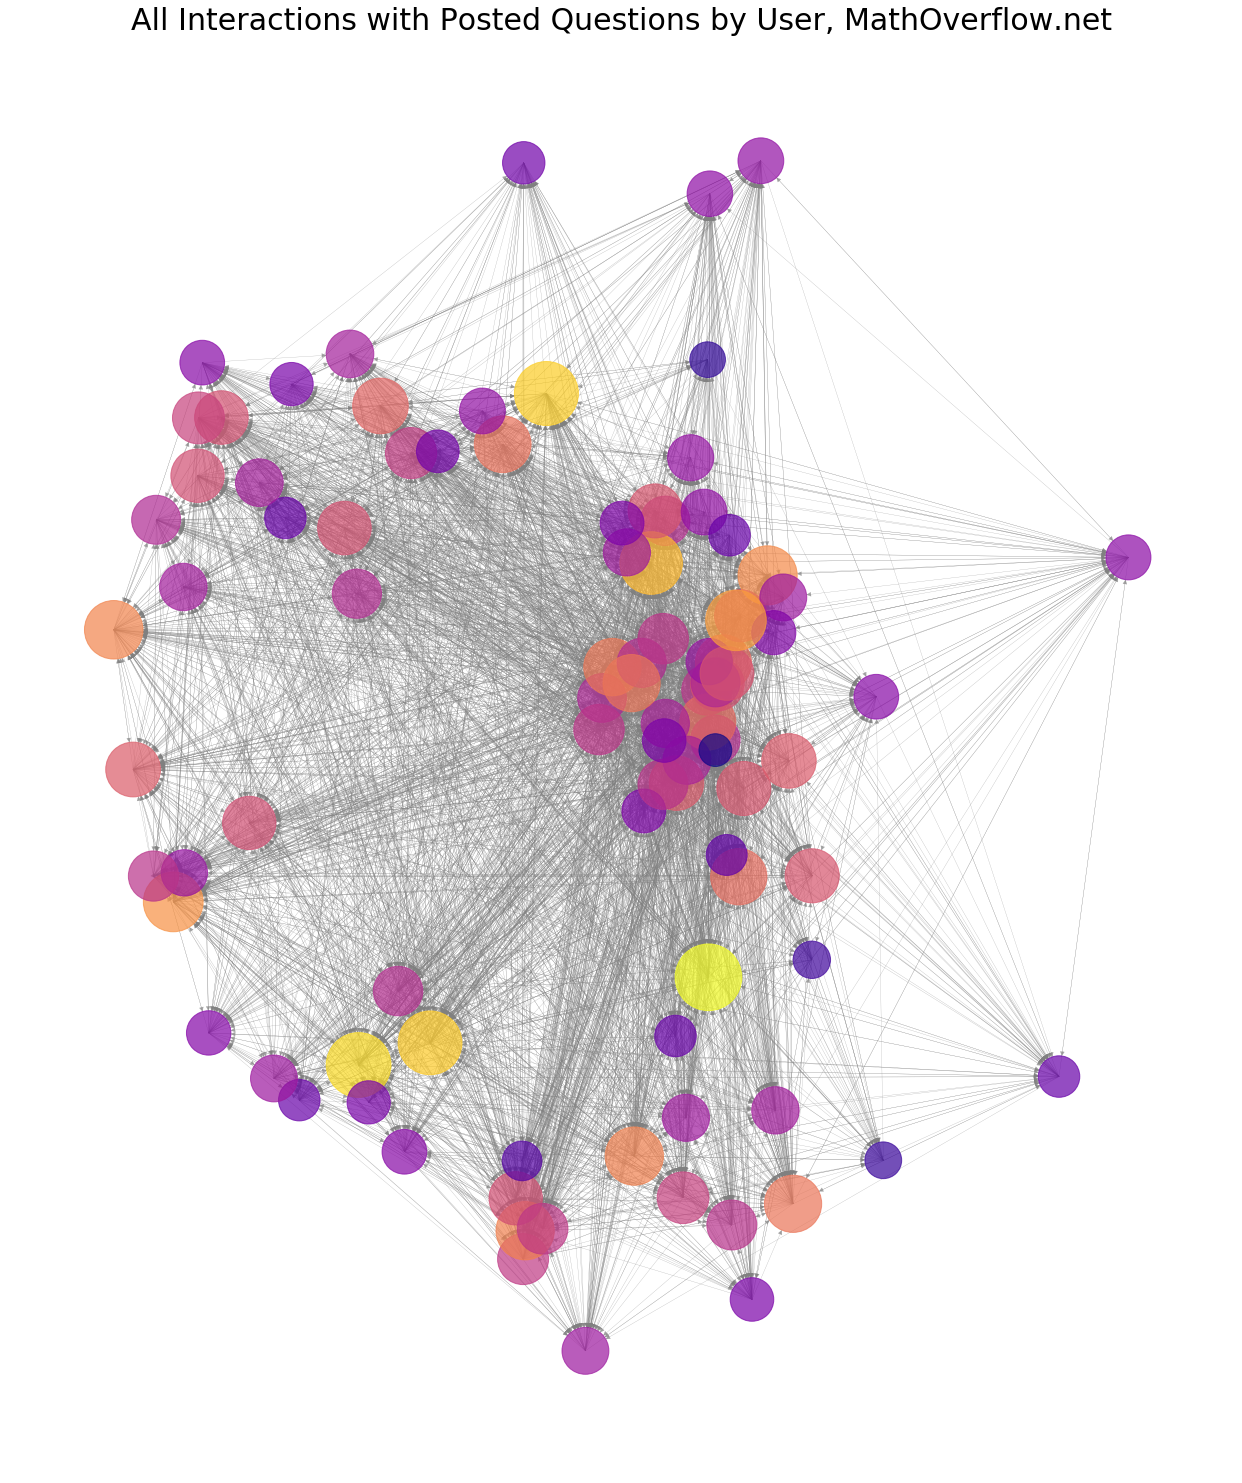

In [51]:
outdeg = GU.out_degree()
to_remove = [n for (n,deg) in outdeg if outdeg[n] <= 400 ]

GU.remove_nodes_from(to_remove)

degrees=GU.degree()
nodes=GU.nodes()

n_color=np.asarray([degrees[n] for n in nodes])

import warnings
from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111,aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

nx.draw(GU,
        node_color=n_color,
        with_labels = False, 
        node_size=n_color*25,
        edge_color='gray', 
        font_size=10,
        font_color='black',
        cmap='plasma',
        width=.25,
        alpha = .7)
plt.title('All Interactions with Posted Questions by User, MathOverflow.net',fontsize=30)
plt.show()

## Analysis

#### Diameter

`Diameter` is essentially a count of the number of edges in the shortest path between the most distant nodes. Because of the nature of the graph of answers the diameter is effectively infinite as there is no path to the most distant nodes (every answer is a directed edge to another node).

Below we calculate the undirected diameter of the answer graph, as well as the diameter of the graph of all interactions.

Reference: https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter

In [52]:
nx.diameter(G.to_undirected())

3

In [53]:
nx.diameter(GU)

2

#### Eccentricity

Shortest path from a node to all other nodes.

In [54]:
nx.eccentricity(GU)

{1450: 2,
 45: 2,
 66: 2,
 75: 2,
 78: 2,
 297: 2,
 121: 2,
 290: 2,
 317: 2,
 353: 2,
 13265: 2,
 2926: 2,
 454: 2,
 763: 2,
 613: 2,
 766: 2,
 394: 2,
 1056: 2,
 1131: 2,
 1149: 2,
 1384: 2,
 1353: 2,
 1310: 2,
 1345: 2,
 1847: 2,
 1463: 2,
 1465: 2,
 1441: 2,
 1409: 2,
 4177: 2,
 1898: 2,
 391: 2,
 1946: 2,
 2290: 2,
 2384: 2,
 2530: 2,
 2554: 2,
 2841: 2,
 2000: 2,
 2874: 2,
 3324: 2,
 3106: 2,
 2954: 2,
 3206: 2,
 3272: 2,
 3402: 2,
 3684: 2,
 3948: 2,
 4144: 2,
 4231: 2,
 4721: 2,
 4832: 2,
 4961: 2,
 6794: 2,
 4312: 2,
 5740: 2,
 5690: 2,
 6094: 2,
 6085: 2,
 6101: 2,
 6666: 2,
 6976: 2,
 7206: 2,
 7460: 2,
 8008: 2,
 8212: 2,
 8799: 2,
 8103: 2,
 9072: 2,
 8430: 2,
 10076: 2,
 10400: 2,
 10503: 2,
 10366: 2,
 11054: 2,
 11142: 2,
 11260: 2,
 11919: 2,
 12166: 2,
 12705: 2,
 13650: 2,
 13972: 2,
 14094: 2,
 15629: 2,
 11540: 2,
 14450: 2,
 14830: 2,
 15934: 2,
 21684: 2,
 9025: 2,
 18060: 2,
 20302: 2,
 25510: 2,
 8385: 2,
 40297: 2}

#### General Descriptives

In [55]:
print('The mean count of incoming interactions for each node:', np.mean([G.in_degree(n) for n in G.nodes]))
print('The mean count of outgoing interactions for each node:', np.mean([G.out_degree(n) for n in G.nodes]))
print('The mean count of all interactions for each node:', np.mean([G.degree(n) for n in G.nodes]))
print('The count of all incoming interactions for every node:', np.sum([G.in_degree(n) for n in G.nodes]))
print('The count of all outgoing interactions for every node:', np.sum([G.out_degree(n) for n in G.nodes]))
print('The count of all interactions for every node:', np.sum([G.degree(n) for n in G.nodes]))
print('Lowest count of incoming interactions:', np.min([G.in_degree(n) for n in G.nodes]),' highest count:', np.max([G.in_degree(n) for n in G.nodes]))
print('Lowest count of outgoing interactions:', np.min([G.out_degree(n) for n in G.nodes]),' highest count:', np.max([G.out_degree(n) for n in G.nodes]))
print('Lowest count of all interactions:', np.min([G.degree(n) for n in G.nodes]),' highest count:', np.max([G.degree(n) for n in G.nodes]))


The mean count of incoming interactions for each node: 22.524590163934427
The mean count of outgoing interactions for each node: 22.524590163934427
The mean count of all interactions for each node: 45.049180327868854
The count of all incoming interactions for every node: 4122
The count of all outgoing interactions for every node: 4122
The count of all interactions for every node: 8244
Lowest count of incoming interactions: 0  highest count: 118
Lowest count of outgoing interactions: 1  highest count: 70
Lowest count of all interactions: 1  highest count: 174


#### Density

Calculate the density of edges in the graph.

In [56]:
nx.density(G)

0.12376148441722212

#### Shortest Path Length, Average

Calculate the average of the shortest path length for all paths in the graph.

In [57]:
nx.average_shortest_path_length(G)

2.0323965651834506

#### Degree Connectivity, Average

For each node of given degree, what is the average degree of its neighbors?

In [58]:
nx.average_degree_connectivity(G)

{49: 40.69387755102041,
 72: 36.55555555555556,
 79: 25.234177215189874,
 59: 27.0,
 32: 45.05,
 91: 25.505494505494507,
 125: 36.816,
 58: 35.54597701149425,
 53: 37.405660377358494,
 68: 33.333333333333336,
 174: 24.5,
 35: 41.78095238095238,
 71: 30.793427230046948,
 31: 42.95161290322581,
 51: 34.73529411764706,
 23: 58.93478260869565,
 13: 59.97435897435897,
 34: 44.63865546218487,
 50: 37.45,
 61: 34.221311475409834,
 40: 39.69375,
 69: 30.170289855072465,
 117: 14.931623931623932,
 47: 26.27659574468085,
 54: 24.88888888888889,
 62: 29.241935483870968,
 45: 30.88888888888889,
 100: 30.46,
 21: 51.888888888888886,
 24: 55.13194444444444,
 46: 31.66304347826087,
 30: 48.50555555555555,
 63: 35.666666666666664,
 110: 23.345454545454544,
 77: 22.90909090909091,
 37: 34.414414414414416,
 88: 23.0,
 104: 28.08653846153846,
 55: 30.745454545454546,
 109: 31.155963302752294,
 70: 28.07857142857143,
 87: 24.03448275862069,
 39: 39.87179487179487,
 81: 44.4320987654321,
 43: 36.4976744186

### Centrality

Reference: 
https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html
https://stackoverflow.com/questions/50241195/networkx-degree-centrality

#### Betweenness

In [59]:
G_dict = dict(nx.betweenness_centrality(G))
ordered_G = sorted(G_dict, key = G_dict.get,reverse = True)

print("\n TOP 10, betweenness centrality:")

for i in range(10):
    print(ordered_G[i])


 TOP 10, betweenness centrality:
11142
290
6094
297
1149
1946
3106
1532
1441
18060


#### Degree

In [60]:
G_dict = dict(nx.degree_centrality(G))
ordered_G = sorted(G_dict, key = G_dict.get,reverse = True)

print("\n TOP 10, degree centrality, overall:")


for i in range(10):
    print(ordered_G[i])


 TOP 10, degree centrality, overall:
290
6094
11142
297
1459
2841
1532
1946
1409
3106


#### In-Degree

In [61]:
G_dict = dict(nx.in_degree_centrality(G))
ordered_G = sorted(G_dict, key = G_dict.get,reverse = True)

print("\n TOP 10, in degree centrality:")


for i in range(10):
    print(ordered_G[i])


 TOP 10, in degree centrality:
6094
290
1459
2841
11142
1532
8799
1409
3106
2051


#### Out-Degree

In [62]:
G_dict = dict(nx.out_degree_centrality(G))
ordered_G = sorted(G_dict, key = G_dict.get,reverse = True)

print("\n TOP 10, out degree centrality:")


for i in range(10):
    print(ordered_G[i])


 TOP 10, out degree centrality:
297
11142
290
454
2384
1946
1450
121
1149
3684


#### Eigenvector

In [63]:
G_dict = dict(nx.eigenvector_centrality(G))
ordered_G = sorted(G_dict, key = G_dict.get,reverse = True)

print("\n TOP 10, eigenvector centrality:")


for i in range(10):
    print(ordered_G[i])


 TOP 10, eigenvector centrality:
290
1459
6094
2841
1532
11142
3106
45
1587
2051
